In [1]:
from pathlib import Path
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure notebook runs from project root
PROJECT_ROOT = Path.cwd()
if PROJECT_ROOT.name == "notebooks":
    PROJECT_ROOT = PROJECT_ROOT.parent

os.chdir(PROJECT_ROOT)

# Add src folder to Python path
sys.path.append(str(PROJECT_ROOT / "src"))

from src.data_utils import read_parquet
pd.set_option("display.max_columns", 200)

print("Working directory:", PROJECT_ROOT)


Working directory: c:\Users\devme\OneDrive\Desktop\trader-behavior-insights


In [2]:
df = read_parquet("trades_processed.parquet")
df['time'] = pd.to_datetime(df['time'])

print(df.shape)
df.head()


(211224, 50)


,account,symbol,execution_price,size,size_usd,side,start_position,direction,closedpnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,time,notional,return_pct,win,trade_date,hour_of_day,weekday,weekend,leverage,date,score,classification,date_minus1,date_plus1,score_minus1,classification_minus1,score_plus1,classification_plus1,score_3d,score_7d,sentiment_shift,winrate_10,avg_return_10,pnl_stability_10,winrate_30,avg_return_30,pnl_stability_30,winrate_100,avg_return_100,pnl_stability_100,conviction,log_notional,log_fee_ratio,risk_per_trade,sentiment_alignment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,4041.0,2.4798,10020.87,BUY,-581.0000,Close Short,-1451.600526,0x965123c5a360fc8e7f9904189483fb02014700290974...,53292414040,False,1.002087,9.740000e+14,1.730000e+12,2024-06-12 23:15:00+00:00,10020.8718,-0.144858,0,2024-06-12,23.25,2.0,0,1,2024-06-12,72.0,Greed,2024-06-11,2024-06-13,74.0,Greed,70.0,Greed,72.666667,74.285714,-1.619048,0.0,-0.144858,NaN,0.0,-0.144858,NaN,0.0,-0.144858,NaN,1.000000,9.212525,0.0001,0.999900,1.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,4041.0,3.0000,12123.00,BUY,-578.5202,Close Short,-1756.110000,0x018550a4b99b91367208041894840302015400d0c7aa...,53292414040,False,1.212300,1.620000e+14,1.730000e+12,2024-06-12 23:15:00+00:00,12123.0000,-0.144858,0,2024-06-12,23.25,2.0,0,1,2024-06-12,72.0,Greed,2024-06-11,2024-06-13,74.0,Greed,70.0,Greed,72.666667,74.285714,-1.619048,0.0,-0.144858,1.795766e-15,0.0,-0.144858,1.795766e-15,0.0,-0.144858,1.795766e-15,1.094930,9.402942,0.0001,1.094832,1.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,4041.0,6.1858,24996.82,BUY,-575.5202,Close Short,-3620.981746,0x3f43cdd36aebe9c997b4041894842401e100fe4c6755...,53292414040,False,2.499681,5.140000e+14,1.730000e+12,2024-06-12 23:15:00+00:00,24996.8178,-0.144858,0,2024-06-12,23.25,2.0,0,1,2024-06-12,72.0,Greed,2024-06-11,2024-06-13,74.0,Greed,70.0,Greed,72.666667,74.285714,-1.619048,0.0,-0.144858,4.463041e-15,0.0,-0.144858,4.463041e-15,0.0,-0.144858,4.463041e-15,1.590780,10.126544,0.0001,1.590678,1.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,4041.0,0.5960,2408.44,BUY,-569.3344,Close Short,-348.880520,0xb8f4dd3b553c727a0bf60418948425020147001033d3...,53292414040,False,0.240843,4.460000e+14,1.730000e+12,2024-06-12 23:15:00+00:00,2408.4360,-0.144858,0,2024-06-12,23.25,2.0,0,1,2024-06-12,72.0,Greed,2024-06-11,2024-06-13,74.0,Greed,70.0,Greed,72.666667,74.285714,-1.619048,0.0,-0.144858,2.495378e-14,0.0,-0.144858,2.495378e-14,0.0,-0.144858,2.495378e-14,0.194428,7.787148,0.0001,0.194412,1.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,4041.0,2.4040,9714.56,BUY,-568.7384,Close Short,-1407.229480,0x011c71b5c80b569eb6200418948425020148009e28c5...,53292414040,False,0.971456,6.940000e+14,1.730000e+12,2024-06-12 23:15:00+00:00,9714.5640,-0.144858,0,2024-06-12,23.25,2.0,0,1,2024-06-12,72.0,Greed,2024-06-11,2024-06-13,74.0,Greed,70.0,Greed,72.666667,74.285714,-1.619048,0.0,-0.144858,2.191864e-14,0.0,-0.144858,2.191864e-14,0.0,-0.144858,2.191864e-14,0.819605,9.181484,0.0001,0.819536,1.0


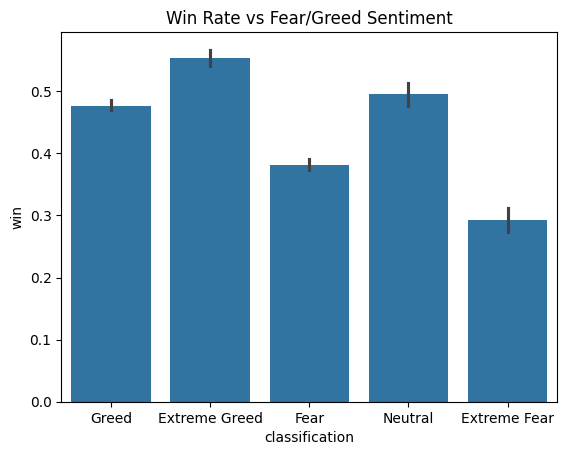

In [3]:
sns.barplot(data=df, x='classification', y='win')
plt.title("Win Rate vs Fear/Greed Sentiment")
plt.show()


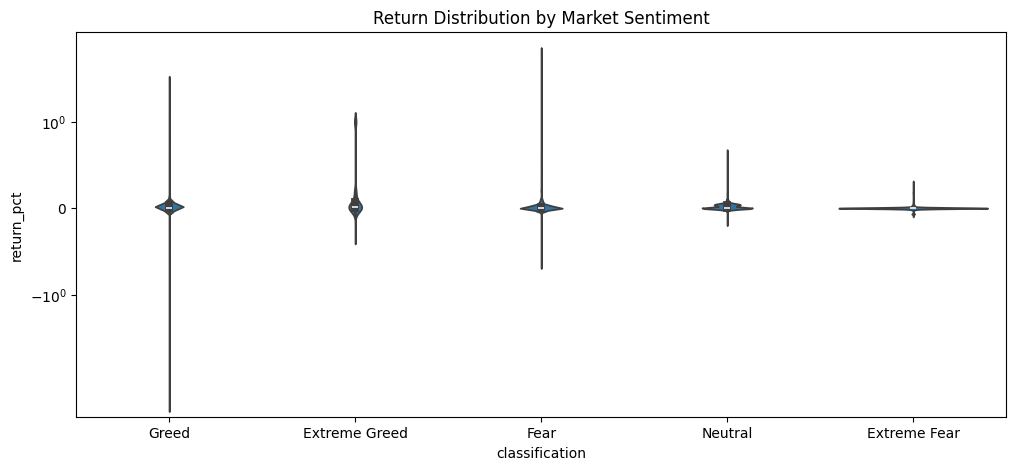

In [4]:
plt.figure(figsize=(12,5))
sns.violinplot(data=df, x='classification', y='return_pct')
plt.yscale('symlog')
plt.title("Return Distribution by Market Sentiment")
plt.show()


In [5]:
from scipy.stats import ttest_ind, mannwhitneyu

fear = df[df['classification']=='Fear']['return_pct'].dropna()
greed = df[df['classification']=='Greed']['return_pct'].dropna()

print("T-test:", ttest_ind(fear, greed, equal_var=False))
print("Mann Whitney:", mannwhitneyu(fear, greed))


T-test: TtestResult(statistic=np.float64(-1.3159377724203016), pvalue=np.float64(0.18820640286044546), df=np.float64(26291.83431505841))
Mann Whitney: MannwhitneyuResult(statistic=np.float64(81233068.0), pvalue=np.float64(1.105391703995111e-47))


In [6]:
df_model = df[df["account"].map(df["account"].value_counts()) >= 10]  # require >=10 trades per account
df_model = df_model.dropna(subset=["return_pct", "score"])           # remove rows missing core signals


In [12]:
symbol_perf = df.groupby('symbol').agg(
    avg_ret=('return_pct','mean'),
    winrate=('win','mean'),
    trades=('win','count')
).sort_values('avg_ret', ascending=False)

symbol_perf.head(20)


,avg_ret,winrate,trades
symbol,,,
@109,0.647814,0.700000,20
@103,0.553964,0.571429,7
@74,0.552289,0.555556,9
@114,0.495335,0.500000,2
@47,0.492297,0.500000,4
@35,0.491277,0.500000,4
@93,0.488442,0.500000,2
@39,0.486744,0.500000,2
@53,0.486239,0.500000,4


In [13]:
symbol_perf.to_csv("reports/symbol_performance.csv", index=False)
print("Saved symbol report.")


Saved symbol report.
